<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #2196F3;
            background: linear-gradient(45deg, #1E1E1E, #2196F3);
            overflow:hidden;
            font-weight:400">
   <b>Load libraries </b>
</div>


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import numpy as np

<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #2196F3;
            background: linear-gradient(45deg, #1E1E1E, #2196F3);
            overflow:hidden;
            font-weight:400">
   <b> Load your Data set</b>
</div>


In [38]:
df = pd.read_csv('data.csv', index_col=0)
# Show the first few rows of the dataset
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [39]:
# Drop the 'id' column early
df.drop(columns=['id'], inplace=True)

<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #2196F3;
            background: linear-gradient(45deg, #1E1E1E, #2196F3);
            overflow:hidden;
            font-weight:400">
   <b>Split the data</b>
</div>


In [40]:
# Extract features (X) and target (y) from the dataset
X = df.drop('satisfaction', axis=1)  # Remove target column to get features
y = df['satisfaction']  # Extract target variable

# Split the data into training and testing sets (80%/20%)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Output the sizes of the training and testing datasets for verification
print(f"Training data size: {x_train.shape}")
print(f"Test data size: {x_test.shape}")


Training data size: (20780, 22)
Test data size: (5196, 22)


In [41]:
y_test

12531                  satisfied
7548     neutral or dissatisfied
3659     neutral or dissatisfied
24398                  satisfied
5936     neutral or dissatisfied
                  ...           
732      neutral or dissatisfied
4441     neutral or dissatisfied
16499    neutral or dissatisfied
3134                   satisfied
5397                   satisfied
Name: satisfaction, Length: 5196, dtype: object

<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #2196F3;
            background: linear-gradient(45deg, #1E1E1E, #2196F3);
            overflow:hidden;
            font-weight:400">
   <b>EDA</b>
</div>


### info

In [42]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20780 entries, 14748 to 3587
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             20780 non-null  object 
 1   Customer Type                      20780 non-null  object 
 2   Age                                20780 non-null  int64  
 3   Type of Travel                     20780 non-null  object 
 4   Class                              20780 non-null  object 
 5   Flight Distance                    20780 non-null  int64  
 6   Inflight wifi service              20780 non-null  int64  
 7   Departure/Arrival time convenient  20780 non-null  int64  
 8   Ease of Online booking             20780 non-null  int64  
 9   Gate location                      20780 non-null  int64  
 10  Food and drink                     20780 non-null  int64  
 11  Online boarding                    20780 non-null  int64

In [43]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5196 entries, 12531 to 5397
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             5196 non-null   object 
 1   Customer Type                      5196 non-null   object 
 2   Age                                5196 non-null   int64  
 3   Type of Travel                     5196 non-null   object 
 4   Class                              5196 non-null   object 
 5   Flight Distance                    5196 non-null   int64  
 6   Inflight wifi service              5196 non-null   int64  
 7   Departure/Arrival time convenient  5196 non-null   int64  
 8   Ease of Online booking             5196 non-null   int64  
 9   Gate location                      5196 non-null   int64  
 10  Food and drink                     5196 non-null   int64  
 11  Online boarding                    5196 non-null   int64 

###  Get summary statistics 

In [44]:
x_train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20712.000000
mean,39.597305,1195.544033,2.721559,3.047642,2.759288,2.981521,3.216747,3.258325,3.446535,3.356930,3.383831,3.350048,3.634697,3.312320,3.646535,3.285034,14.329981,14.746813
std,15.158657,996.592914,1.332945,1.532880,1.412919,1.281514,1.330286,1.358061,1.320442,1.336852,1.281207,1.318147,1.174590,1.270314,1.179635,1.317435,37.409448,37.389141
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,416.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,850.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1749.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,951.000000,940.000000


In [45]:
x_test.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5181.000000
mean,39.715550,1186.767513,2.737490,3.043495,2.746728,2.959392,3.209777,3.275019,3.459969,3.361047,3.392995,3.350654,3.627406,3.321594,3.660123,3.290993,14.210547,14.717043
std,15.044545,1007.069241,1.345147,1.535475,1.413172,1.284574,1.336490,1.345437,1.318753,1.344198,1.285703,1.321846,1.184326,1.265491,1.184905,1.326999,37.481400,38.030137
min,7.000000,67.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,27.000000,408.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1694.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000


In [46]:
# Identify numeric columns
numeric_columns = x_train.select_dtypes(include=['int64', 'float64']).columns

In [47]:
# check some rows that contain negative values
for col in numeric_columns:
    negative_rows = x_train[x_train[col] < 0]
    if not negative_rows.empty:
        print(f"\nRows with negative values in column '{col}':")
        display(negative_rows[[col]].head())


### Function to detect outliers using the 1.5*IQR rule

In [48]:
def check_outliers(df):
    outlier_summary = {}
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
            outlier_summary[col] = {
                'num_outliers': outliers.count(),
                'percent_outliers': 100 * outliers.count() / len(df)
            }
    outlier_df = pd.DataFrame(outlier_summary).T
    print(outlier_df)

In [49]:
check_outliers(x_train)

                                   num_outliers  percent_outliers
Age                                         0.0          0.000000
Flight Distance                           435.0          2.093359
Inflight wifi service                       0.0          0.000000
Departure/Arrival time convenient           0.0          0.000000
Ease of Online booking                      0.0          0.000000
Gate location                               0.0          0.000000
Food and drink                              0.0          0.000000
Online boarding                             0.0          0.000000
Seat comfort                                0.0          0.000000
Inflight entertainment                      0.0          0.000000
On-board service                            0.0          0.000000
Leg room service                            0.0          0.000000
Baggage handling                            0.0          0.000000
Checkin service                          2593.0         12.478345
Inflight s

In [50]:
# Check for missing values 
print( x_train.isnull().sum())


Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             68
dtype: int64


In [51]:
print( x_test.isnull().sum())


Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             15
dtype: int64


In [52]:
print( y_train.isnull().sum())


0


In [53]:
print( y_test.isnull().sum())


0


In [54]:
# Check for duplicated rows 
print("Number of duplicated rows:", x_train.duplicated().sum())

Number of duplicated rows: 0


In [55]:
print("Number of duplicated rows:", x_test.duplicated().sum())

Number of duplicated rows: 0


## there is no duplicates in my data 
## there is nulls in nulls in :Arrival Delay in Minutes column
## there is outliers in : Customer Type , Flight Distance ,Arrival Delay in Minutes   ,Departure Delay in Minutes    ,Checkin service coulumns 

<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #2196F3;
            background: linear-gradient(45deg, #1E1E1E, #2196F3);
            overflow:hidden;
            font-weight:400">
   <b>plots</b>
</div>


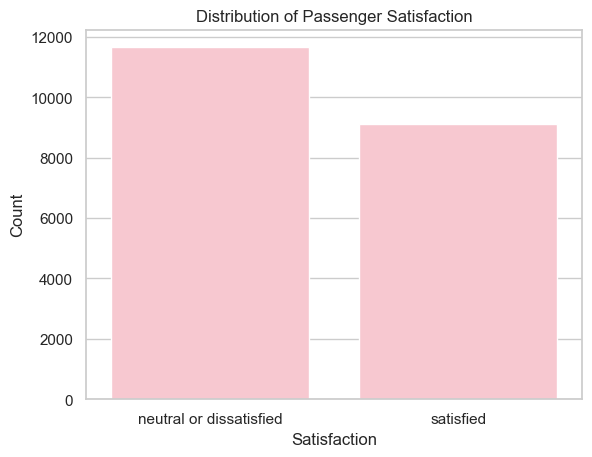

In [56]:
# Plot the target variable distribution for the training set
sns.countplot(x=y_train, color='pink')
plt.title("Distribution of Passenger Satisfaction")
plt.xlabel("Satisfaction")
plt.ylabel("Count")
plt.show()

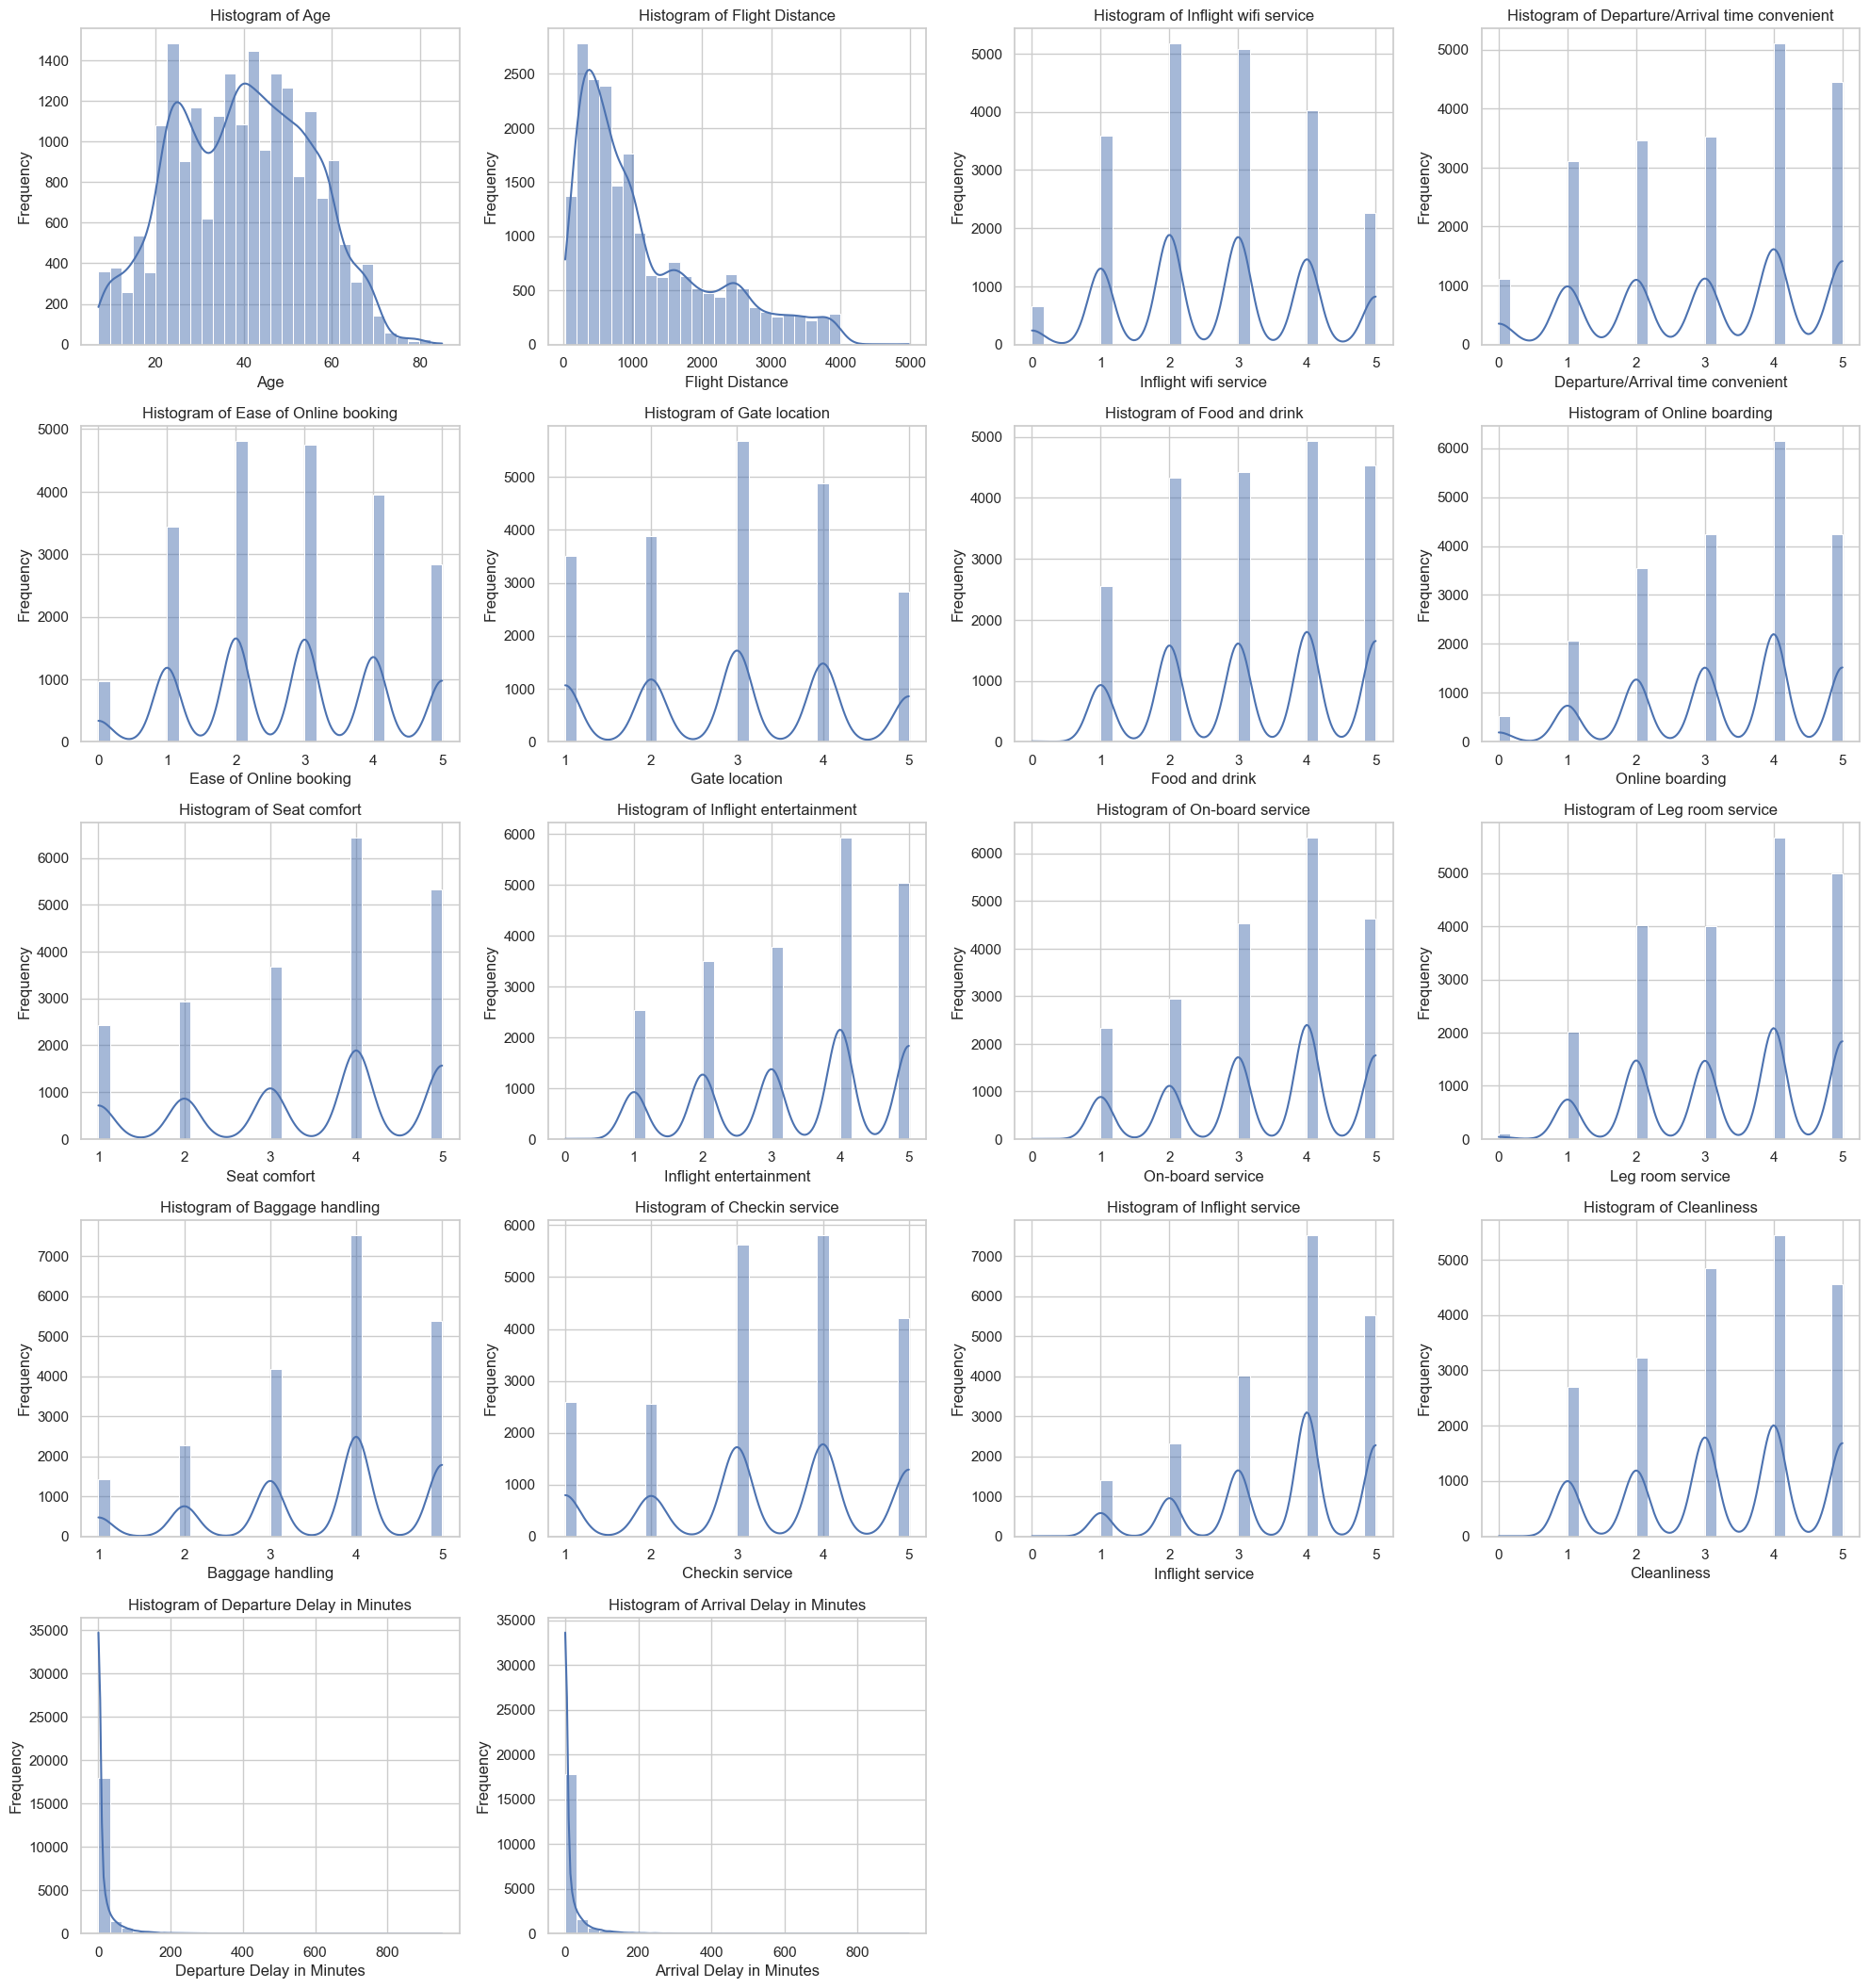

In [59]:
# Histograms for numerical features in the training data
# Set up the plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 25))

# Plot histograms for all numeric features
for i, column in enumerate(numeric_columns):
    plt.subplot(6, 4, i + 1)  # Adjust subplot grid size as needed
    sns.histplot(x_train[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

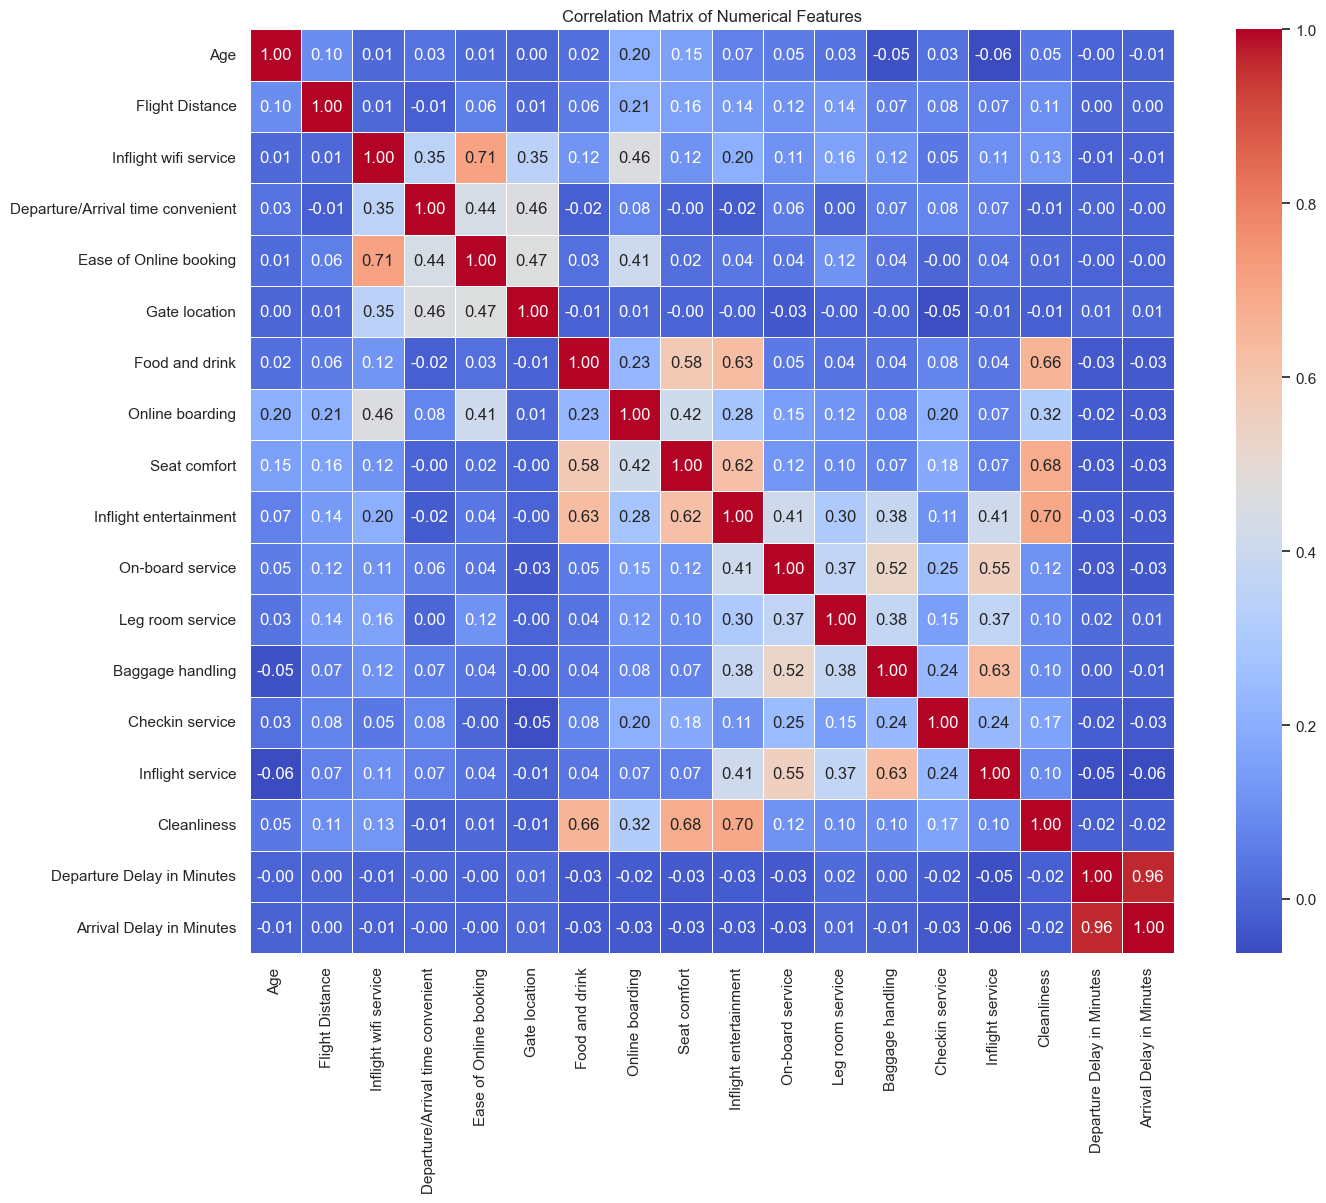

In [60]:
# Compute the correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

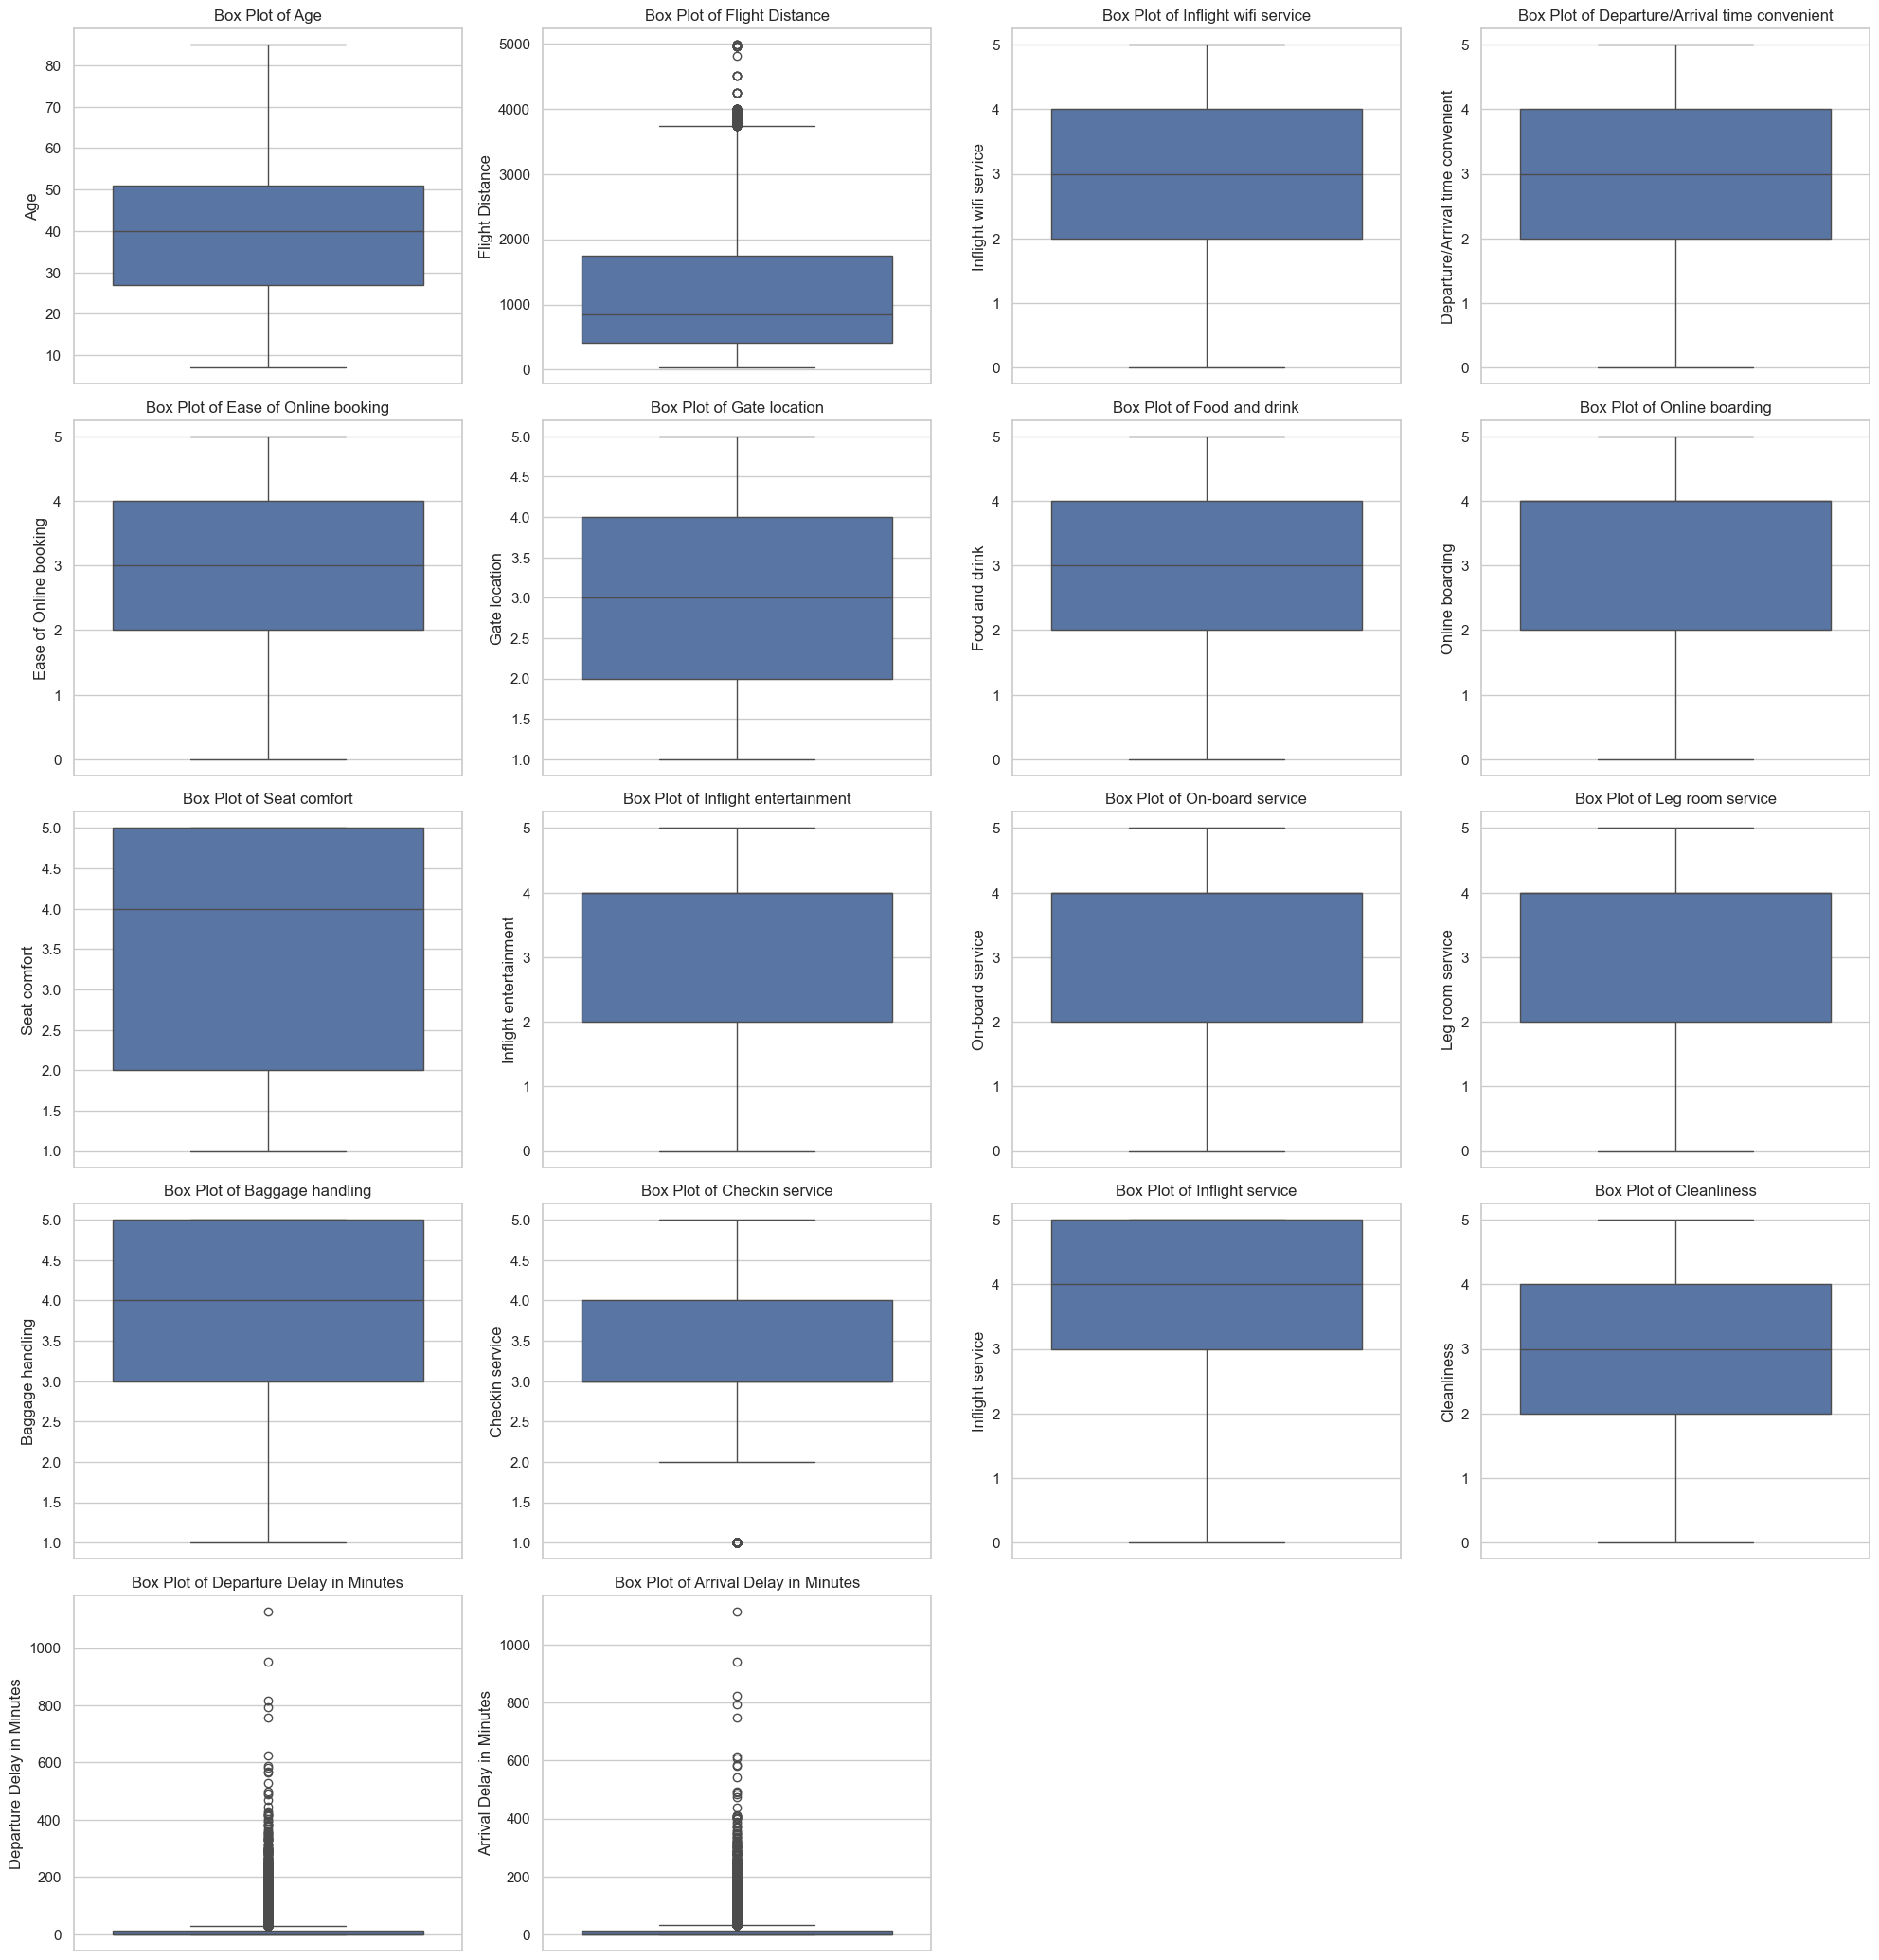

In [61]:
# Boxplots comparing Diabetes_binary with continuous features

# Set up the plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 25))

# Create box plots for each numeric feature
for i, column in enumerate(numeric_columns):
    plt.subplot(6, 4, i + 1)  # Adjust grid size if needed
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

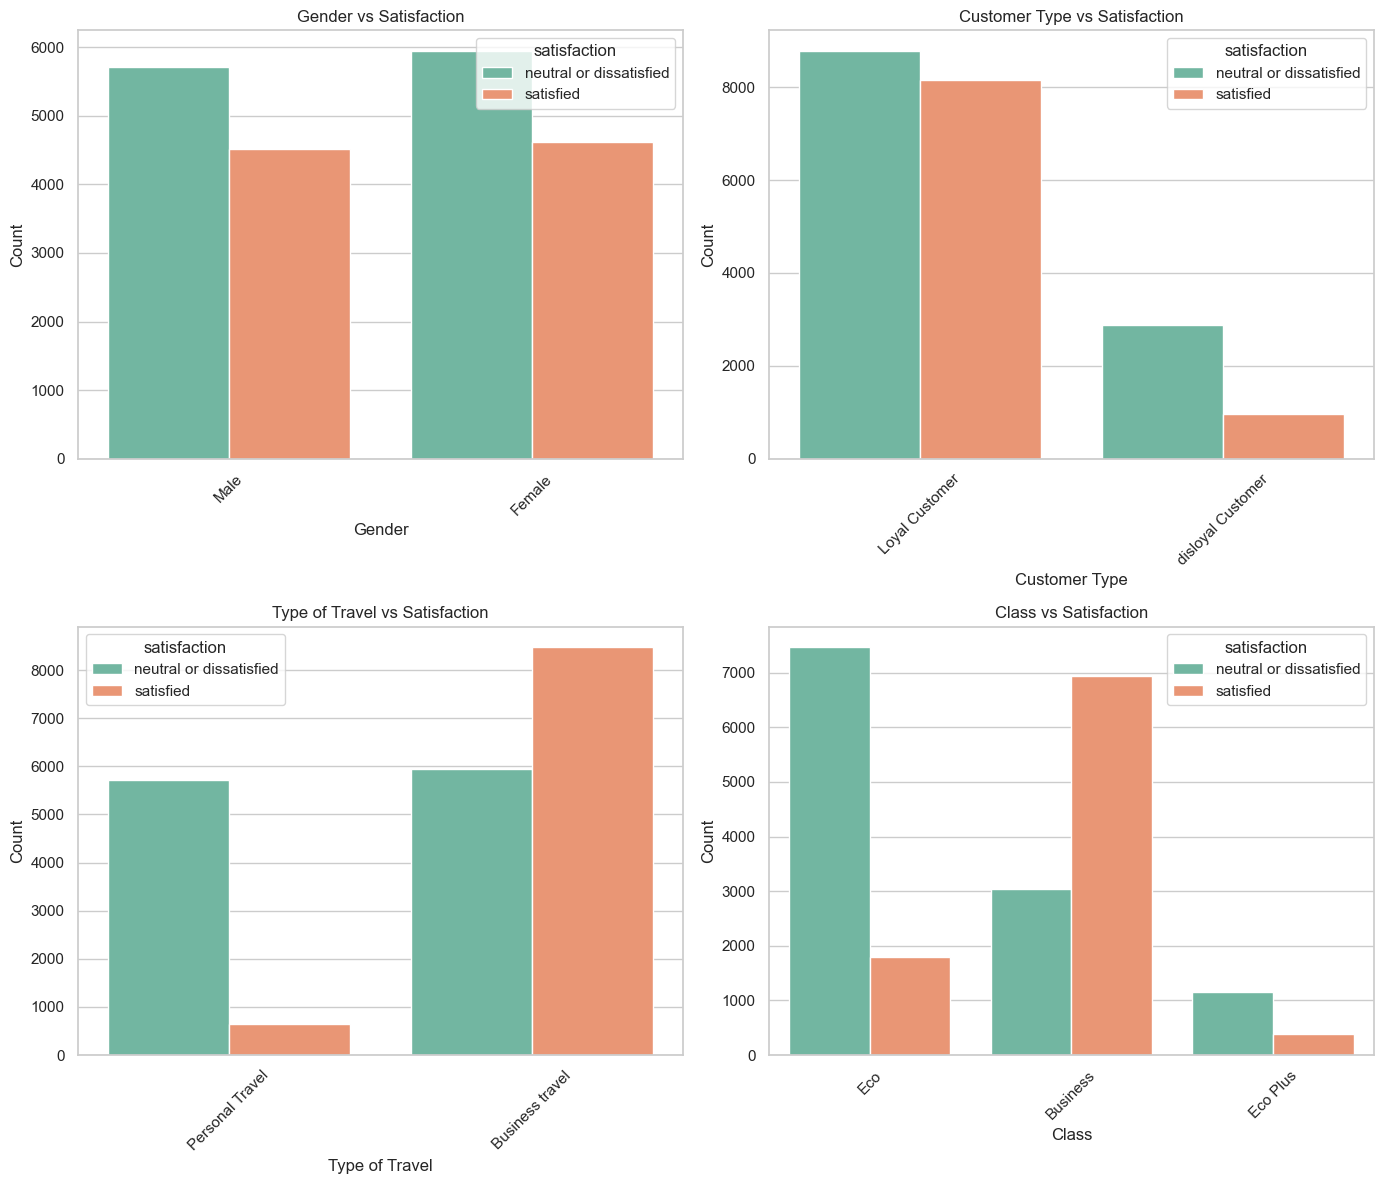

In [62]:
# Categorical columns to visualize
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Plot countplots for categorical features
plt.figure(figsize=(14, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=x_train[col], hue=y_train, palette="Set2")
    plt.title(f"{col} vs Satisfaction")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


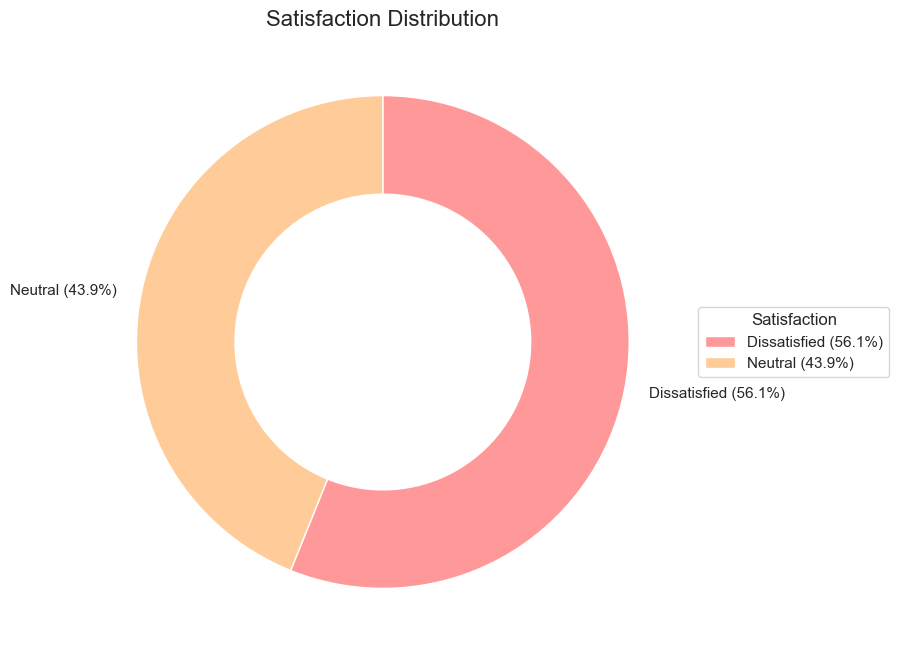

In [63]:
# Assuming y_train contains the satisfaction values
satisfaction_counts = y_train.value_counts().sort_index()

# Define the labels based on the satisfaction categories
labels = ['Dissatisfied', 'Neutral', 'Satisfied']  
sizes = satisfaction_counts.values

# Define colors for each category
colors = ['#ff9999', '#ffcc99', '#66b3ff']  

# Calculate percentages
percentages = sizes / sizes.sum() * 100
labels_with_pct = [f'{label} ({pct:.1f}%)' for label, pct in zip(labels, percentages)]

# Plot donut chart
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(
    sizes,
    labels=labels_with_pct,
    colors=colors,
    startangle=90,
    counterclock=False,
    wedgeprops={'width': 0.4}
)

# Add legend with percentages
plt.legend(
    wedges,
    labels_with_pct,
    title="Satisfaction",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title('Satisfaction Distribution', fontsize=16)
plt.show()


<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #2196F3;
            background: linear-gradient(45deg, #1E1E1E, #2196F3);
            overflow:hidden;
            font-weight:400">
   <b> Data Preprocessing Pipeline </b>
</div>


### Function to Cap Outliers


In [64]:
# Function to cap outliers
def cap_outliers_array(X):
    X_capped = X.copy()
    for i in range(X_capped.shape[1]):
        col = X_capped[:, i]
        Q1 = np.percentile(col, 25)
        Q3 = np.percentile(col, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        X_capped[:, i] = np.clip(col, lower_bound, upper_bound)
    return X_capped


### Data Preprocessing Pipelines for Numeric and Categorical Class Columns


In [65]:
# Data Preprocessing Pipeline

# Numeric columns
numeric_columns = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical columns
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel']
class_column = ['Class']

# Pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('cap_outliers', FunctionTransformer(cap_outliers_array, validate=False)),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

class_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, drop='first'))
])

### Column Transformer to Apply Pipelines


In [66]:
# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_pipeline, categorical_columns),
        ('class', class_pipeline, class_column)
    ]
)

<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #2196F3;
            background: linear-gradient(45deg, #1E1E1E, #2196F3);
            overflow:hidden;
            font-weight:400">
   <b> Building the Final Pipeline (Preprocessing, PCA, and SVM Classifier) </b>
</div>


In [67]:
# Final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.90)),
    ('classifier', SVC())
])

<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #2196F3;
            background: linear-gradient(45deg, #1E1E1E, #2196F3);
            overflow:hidden;
            font-weight:400">
   <b> GridSearchCV for Hyperparameter Tuning </b>
</div>


In [71]:
# GridSearchCV
param_grid = {
    'classifier__C': [ 0.1, 1, 10],
    'classifier__gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'classifier__kernel': ['rbf','linear'] 
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best model and hyperparameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


KeyboardInterrupt: 

### 
<div style="padding:10px;
            color:#ffffff;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #2196F3;
            background: linear-gradient(45deg, #1E1E1E, #2196F3);
            overflow:hidden;
            font-weight:400">
   <b> Making Predictions and Evaluating the Model </b>
</div>


Training Accuracy: 0.9525
Testing Accuracy:  0.9190

Classification Report:
                          precision    recall  f1-score   support

neutral or dissatisfied       0.92      0.93      0.93      2915
              satisfied       0.91      0.90      0.91      2281

               accuracy                           0.92      5196
              macro avg       0.92      0.92      0.92      5196
           weighted avg       0.92      0.92      0.92      5196



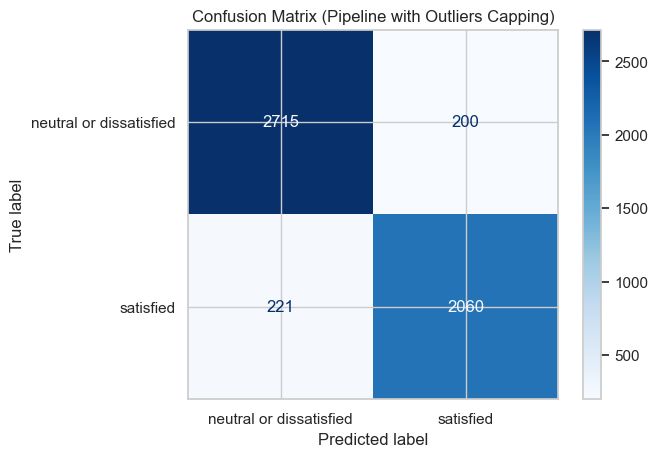

In [35]:
# Predictions and Evaluation
y_pred = best_model.predict(x_test)

print(f"Training Accuracy: {best_model.score(x_train, y_train):.4f}")
print(f"Testing Accuracy:  {best_model.score(x_test, y_test):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Pipeline with Outliers Capping)")
plt.show()


In [38]:
import joblib
joblib.dump(best_model, 'model_pipeline.pkl')

['model_pipeline.pkl']

### Post-PCA: Displaying Information and Visualizations


Original number of features: 23
Reduced number of features after PCA: 14


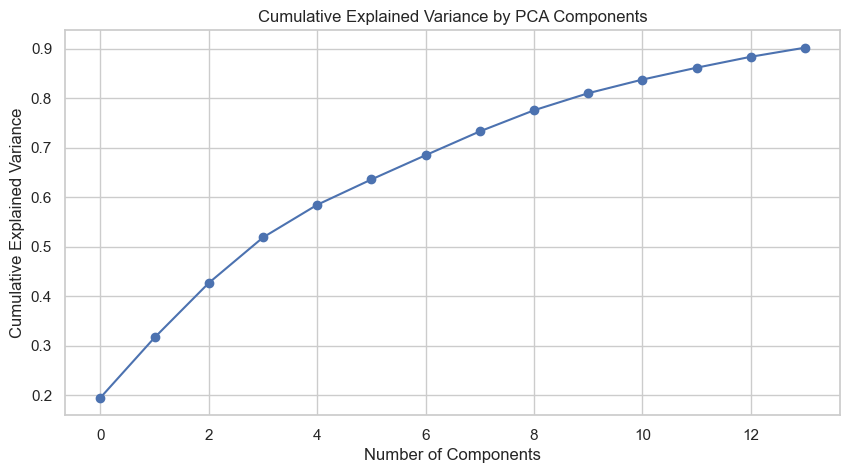

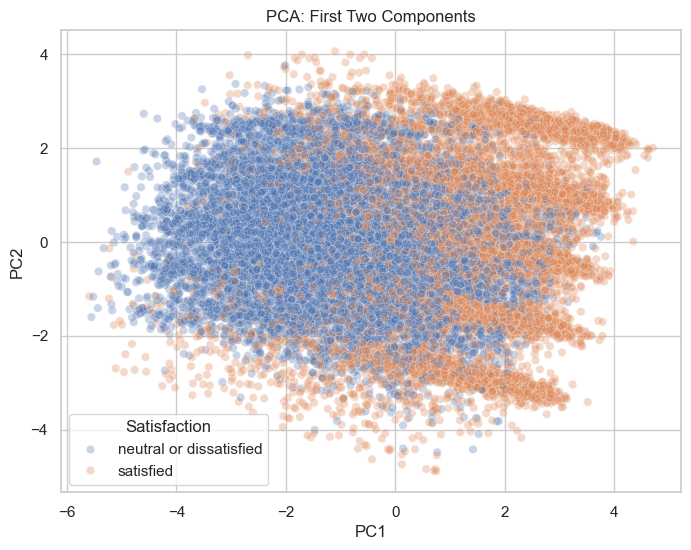

In [36]:
# Extract PCA and transformed data
pca = best_model.named_steps['pca']
x_train_pca = pca.transform(best_model.named_steps['preprocessor'].transform(x_train))

# Print original and reduced features
print(f"Original number of features: {x_train.shape[1]}")
print(f"Reduced number of features after PCA: {x_train_pca.shape[1]}")

# Visualize explained variance ratio (Cumulative Explained Variance)
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Scatter plot of the first two components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_train_pca[:, 0], y=x_train_pca[:, 1], hue=y_train, alpha=0.3)
plt.title("PCA: First Two Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Satisfaction")
plt.show()


In [2]:
# New Data for Prediction (one sample)

new_data = pd.DataFrame([{
    'id':1,
    'Gender': 'Male',
    'Customer Type': 'disloyal Customer',
    'Age': 35,
    'Type of Travel': 'Business travel',
    'Class': 'Eco',
    'Flight Distance': 1500,
    'Inflight wifi service': 4,
    'Departure/Arrival time convenient': 3,
    'Ease of Online booking': 3,
    'Gate location': 3 ,
    'Food and drink': 3,
    'Online boarding': 4,
    'Seat comfort': 4,
    'Inflight entertainment': 4,
    'On-board service': 4,
    'Leg room service': 3,
    'Baggage handling': 4,
    'Checkin service': 3,
    'Inflight service': 4,
    'Cleanliness': 4,
    'Departure Delay in Minutes': 10,
    'Arrival Delay in Minutes': 5
}])

# Make prediction
new_prediction = best_model.predict(new_data)

# Show result
print(f"\nPrediction for the new sample: {new_prediction[0]}")


NameError: name 'pd' is not defined